## Utilizando a metodologia CRISP-DM
### - Contextualização de Negócios
### - Entendimento dos Dados
### - Preparação dos Dados
### - Modelagem
### - Avaliação
### - Deployment/Entrega






## Etapas da análise de clusters
### - Representação do Problema
### - Selecionar Medida de Proximidade
### - Selecionar Algoritmo
### - Avaliar Grupos encontrados

## Checando Animais no Zoologico 

In [15]:
#importando bibliotecas
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import combinations
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

import warnings
warnings.filterwarnings('ignore')

In [16]:
#Analisando dataframe
df = pd.read_csv('c:/csv/zoo/zoo.csv')
df.head()

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
0,porco formigueiro,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
1,antílope,1,0,0,1,0,0,0,1,1,1,0,0,1,4,1
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
3,urso,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
4,javali,1,0,0,1,0,0,1,1,1,1,0,0,1,4,1


In [17]:
#checando linhas e colunas
df.shape

(101, 16)

In [18]:
#mapeando tipos
tipo = {1:'mamifero', 2:'passaro', 3:'reptil',
       4:'peixe', 5:'anfibio', 6:'inseto', 7:'invertebrado'}

In [19]:
#checando como as variaveis se correlacionam
comb_var = list(combinations(df.columns[1:-2], 2))
result = []

#checando quantas vezes cada uma das features se correlacionam
for c in comb_var:
    if c[0] != c[1]:
        sim = sum((df[c[0]] != df[c[1]]))/len(df)
        result.append((c[0], c[1], sim))

In [20]:
#checando relacionamentos
df_res = pd.DataFrame(result, columns = ['var1', 'var2', 'metrica'])
df_res.sort_values(by=['metrica'])

,var1,var2,metrica
2,pelos,leite,0.059406
71,espinha_dorsal,cauda,0.099010
14,penas,salta,0.118812
55,aquatico,nadadeiras,0.188119
36,leite,dentes,0.217822
...,...,...,...
69,espinha_dorsal,venenoso,0.821782
53,aquatico,respira,0.831683
73,respira,nadadeiras,0.881188
1,pelos,ovos,0.910891


In [21]:
#checando caracteristicas de animais aquaticos
df[df['aquatico'] ==1]

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
7,carpa,0,0,1,0,0,1,0,1,1,0,0,1,1,0,4
8,bagre,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
14,caranguejo,0,0,1,0,0,1,1,0,0,0,0,0,0,4,7
15,lagostim,0,0,1,0,0,1,1,0,0,0,0,0,0,6,7
18,cação,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
19,golfinho,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1
21,pato,0,1,1,0,1,1,0,0,1,1,0,0,1,2,2
25,sapo,0,0,1,0,0,1,1,1,1,1,0,0,0,4,5


In [22]:
#retirando colunas deleites e ovos, por elas sempre aparecerem invertidas
df_new = df.drop(columns = ['leite', 'ovos'])

In [23]:
#gerando matriz
X = df_new.iloc[:, 1:-1]
X

,pelos,penas,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas
0,1,0,0,0,1,1,1,1,0,0,0,4
1,1,0,0,0,0,1,1,1,0,0,1,4
2,0,0,0,1,1,1,1,0,0,1,1,0
3,1,0,0,0,1,1,1,1,0,0,0,4
4,1,0,0,0,1,1,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,0,0,1,1,1,0,0,1,2
97,1,0,1,0,0,0,0,1,1,0,0,6
98,1,0,0,0,1,1,1,1,0,0,1,4
99,0,0,0,0,0,0,0,1,0,0,0,0


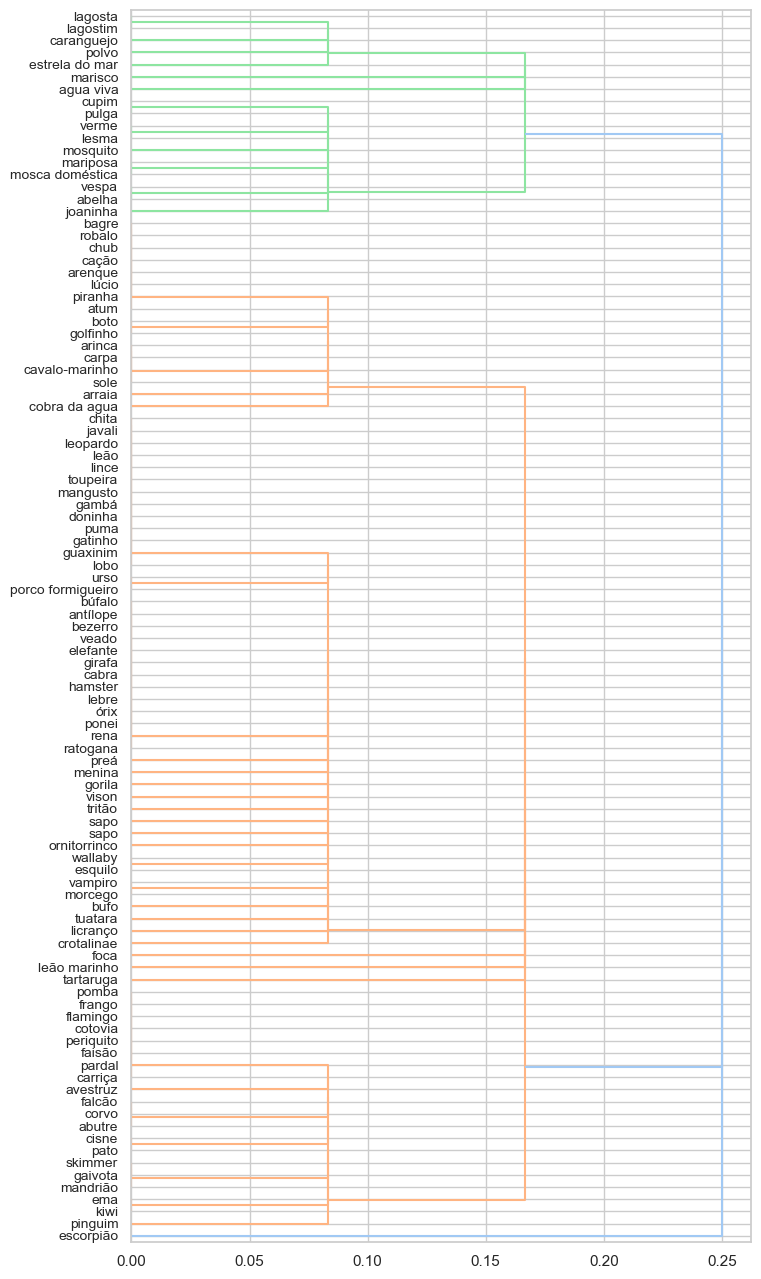

In [24]:
#Agrupamento hierarquico
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [25]:
#definindo grupos (total 11)
fcluster(Z, .1, criterion='distance')

array([ 2,  2,  3,  2,  2,  2,  2,  3,  3,  2,  2,  1,  3,  9,  8,  8,  1,
        2,  3,  3,  1,  1,  2,  1,  7,  2,  2,  2,  2,  2,  7,  2,  2,  1,
        3,  2,  2,  1,  3,  7,  7,  1,  7,  1,  2,  2,  8,  2,  2,  2,  2,
        7,  2,  8,  2,  2,  1,  1,  1,  1,  3,  3,  2,  2,  2,  2,  3,  2,
        2,  2,  2,  1, 11,  3,  4,  5,  3, 10,  1,  1,  2,  7,  3,  1,  2,
        8,  3,  1,  7,  2,  6,  2,  3,  2,  2,  1,  2,  7,  2,  7,  1],
      dtype=int32)

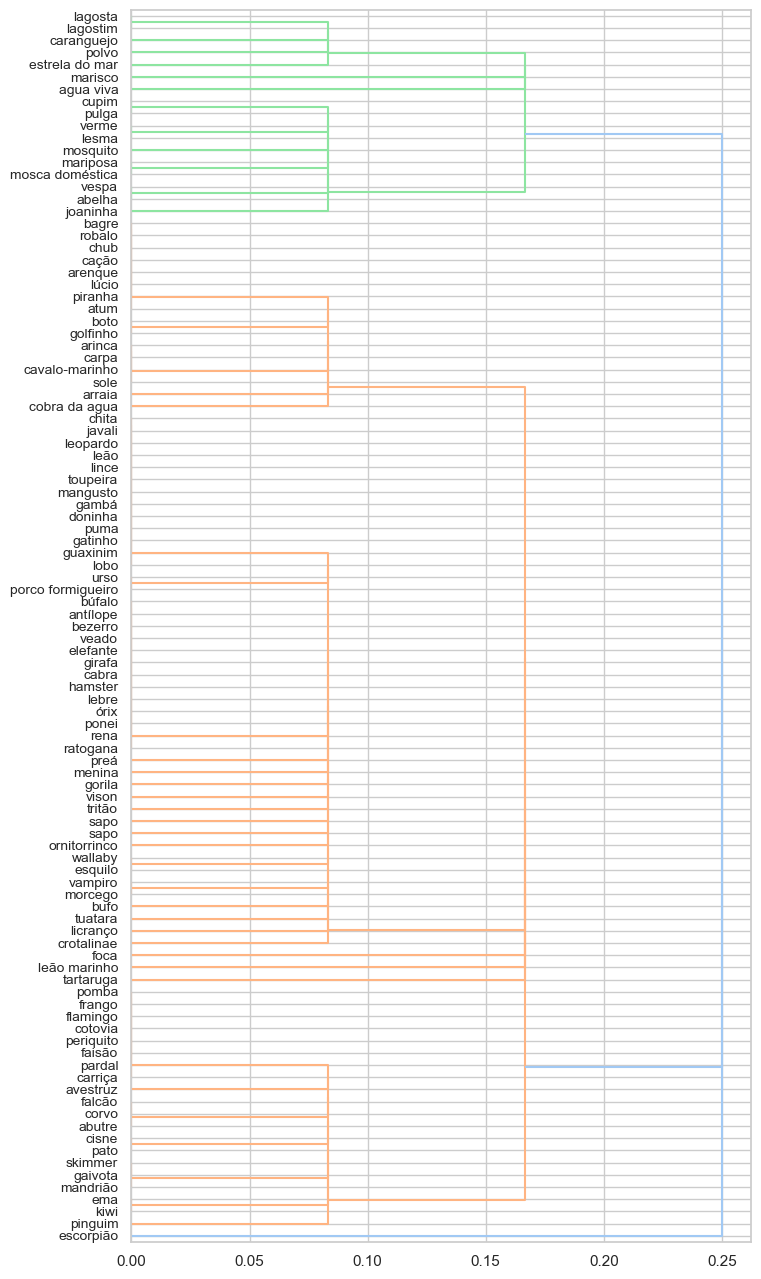

In [26]:
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [27]:
#checando escorpião
df[df.animal == 'escorpião']

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
72,escorpião,0,0,0,0,0,0,1,0,0,1,1,0,1,8,7


In [28]:
#mesmo fazendo sentido foi optado por remover ele
df_temp = df[df.animal != 'escorpião']
X = df_temp.iloc[:, 1:-1]

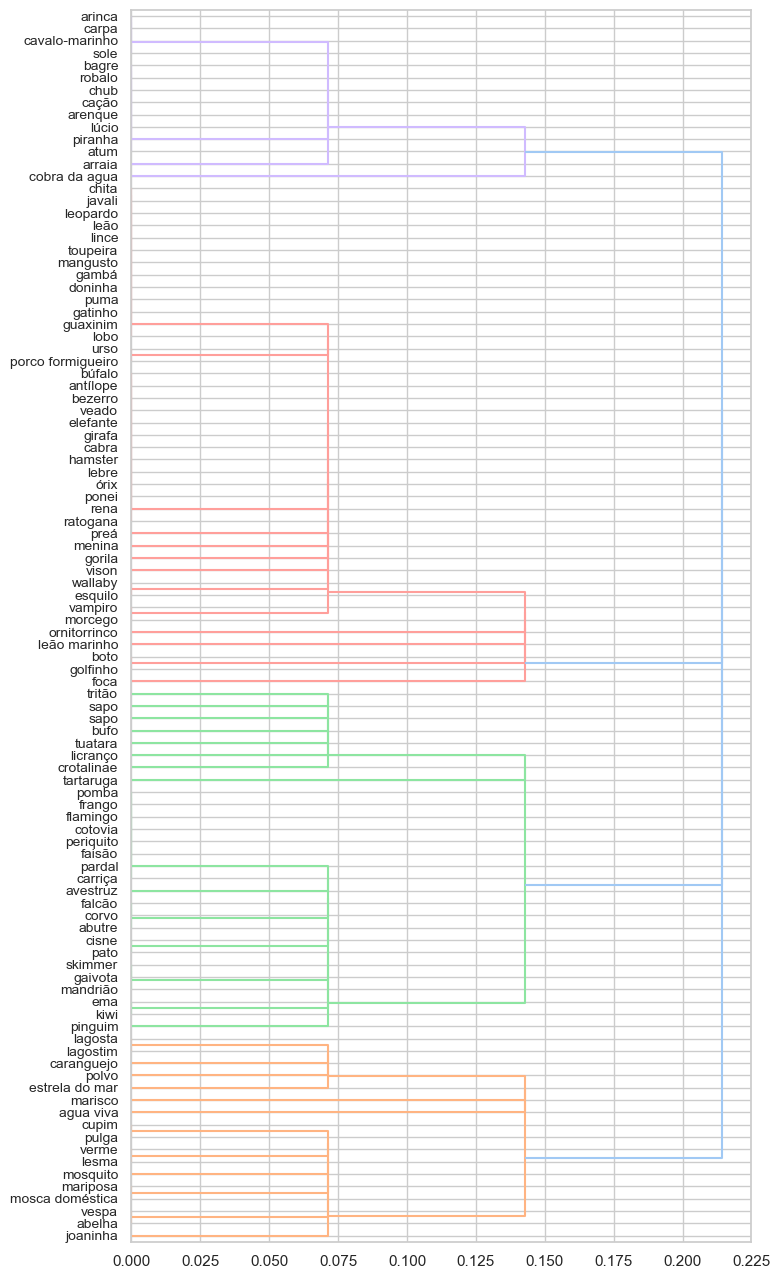

In [29]:
#checando base sem escorpião
# Importa a função linkage da biblioteca scipy.cluster.hierarchy
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))#plotando o dendograma
dendrogram(Z,  truncate_mode=None, labels=list(df_temp.animal), # Define os rótulos dos ramos do dendrograma como os animais do DataFrame df_temp
           orientation='right',# Define a orientação do dendrograma como vertical
           leaf_font_size=10,leaf_rotation=0,);#  Define o tamanho da fonte dos rótulos dos ramos e define a rotação dos rótulos dos ramos

#se cortamos a analise no 0,15 é observado que tem 4 grupos
#se cortar +- no 0,7 é observado 14 grupos

In [30]:
fcluster(Z, .1, criterion='distance')

array([ 9,  9, 13,  9,  9,  9,  9, 13, 13,  9,  9,  5, 13,  3,  2,  2,  5,
        9, 13,  8,  5,  5,  9,  5,  1,  6,  6,  9,  9,  9,  1,  9,  9,  5,
       13,  9,  9,  5, 13,  1,  1,  5,  1,  5,  9,  9,  2,  9,  9,  9,  9,
        1,  6,  2,  9,  9,  5,  5,  5,  5, 13, 13,  6, 10,  9,  9,  8,  9,
        9,  9,  9,  5, 13, 12, 11, 14,  4,  5,  5,  6,  1, 13,  5,  9,  2,
       13,  5,  1,  6,  7,  6, 13,  9,  9,  5,  9,  1,  9,  1,  5],
      dtype=int32)

In [31]:
from sklearn import metrics

In [32]:
#checando o quão bom estão os grupos
#definindo o melhor corte pro grupo
distances = [.05, .1, .125, .15, .25]
y = df_temp['tipo'].values
for i in distances:
    labels = fcluster(Z, i, criterion='distance')
    print(f"k={len(set(labels))} corte={i} - rand index={metrics.rand_score(labels, y):.3f}")
#o corte 0,125 tem a maior taxa de indexação mas há 14 clusters o que não é tão interessante para analise
#o corte 0,15 tem uma indexação bem proxima e há somente 4 clusters o que o torna mais interessante pra analise

k=44 corte=0.05 - rand index=0.812
k=14 corte=0.1 - rand index=0.950
k=14 corte=0.125 - rand index=0.950
k=4 corte=0.15 - rand index=0.946
k=1 corte=0.25 - rand index=0.236


In [33]:
#alterando metrica pra analise
distances = [.05, .1, .125, .15, .25]
y = df_temp['tipo'].values
for i in distances:
    labels = fcluster(Z, i, criterion='distance')
    print(f"k={len(set(labels))} corte={i} - rand index={metrics.adjusted_rand_score(labels, y):.3f}")
#usando o rand score ajustado o corte 0,15 realmente é melhor    

k=44 corte=0.05 - rand index=0.278
k=14 corte=0.1 - rand index=0.852
k=14 corte=0.125 - rand index=0.852
k=4 corte=0.15 - rand index=0.862
k=1 corte=0.25 - rand index=0.000


## Segmentação de clientes no Varejo

In [34]:
import pandas as pd
from itertools import product

In [35]:
#checando base de informações de tipo de produto
df = pd.read_csv('c:/csv/dados_clientes.csv')
df.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


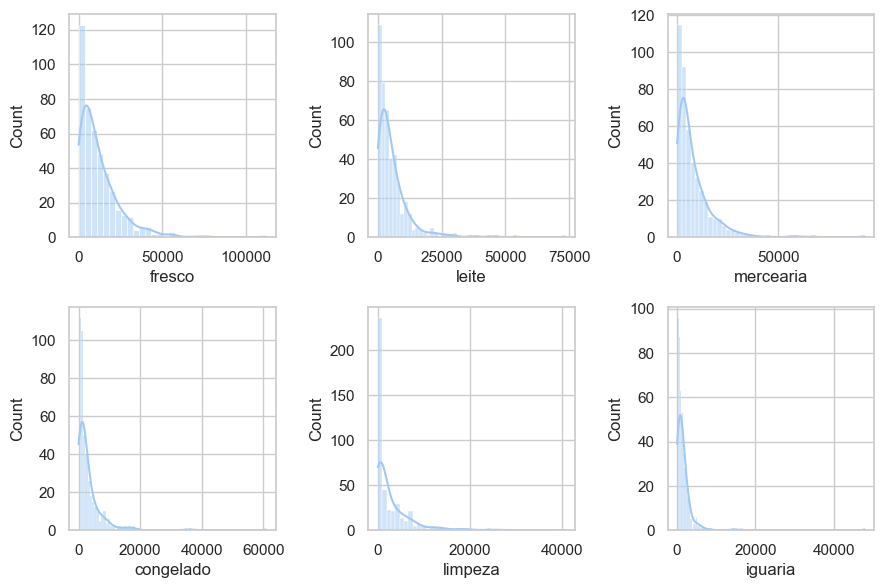

In [36]:
#checando a distribuição das variaveis
fig, axs = plt.subplots(2,3, figsize=(9,6))

pos = list(product(range(2), range(3)))

for i, c in enumerate(df.columns[2:]):
    sns.histplot(data=df, x=c, kde=True, ax=axs[pos[i]])
plt.tight_layout()
plt.show()

#Checando gastos com produtos
#quanto maior o valor menor é a quantidade de gastos com o produto

In [37]:
#Entendendo a base
#checando valores

df.describe()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [38]:
#após analisar a base é notado um gasto alto em iguaria (47843 em iguarias)
#checando o cliente que gastou esse valor
#ele tem um gasto relativamente alto em todos os produtos exceto limpeza
df[df.iguaria > 2000].sort_values(by=['iguaria'])

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
300,2,2,16448,6243,6360,824,2662,2005
61,2,3,35942,38369,59598,3254,26701,2017
281,2,3,12238,7108,6235,1093,2328,2079
430,1,3,3097,4230,16483,575,241,2080
9,2,3,6006,11093,18881,1159,7425,2098
...,...,...,...,...,...,...,...,...
181,1,3,112151,29627,18148,16745,4948,8550
87,1,3,43265,5025,8117,6312,1579,14351
71,1,3,18291,1266,21042,5373,4173,14472
23,2,3,26373,36423,22019,5154,4337,16523


In [39]:
#soma de tudo que o cliente gastou no ano
df.iloc[:, 2:].sum(axis=1)

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Length: 440, dtype: int64

In [40]:
#adicionando a soma dentro de um dataframe novo
df_new = df.copy()
df_new['total'] = df.iloc[:, 2:].sum(axis=1)

In [41]:
#checando novo dataframe
df_new.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [42]:
#loop pra pegar cada uma das colunas e dividir pelo valor total e descobrir a porcentagem de gasto do cliente em cima do total
#adiciona os resultados no novo dataframe
for c in df_new.columns[2:8]:
    df_new[f'perc_{c}'] = df_new[c]/df_new['total']

In [43]:
df_new

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,0.405214,0.164402,0.218643,0.179190,0.002483,0.030067
436,1,3,39228,1431,764,4510,93,2346,48372,0.810965,0.029583,0.015794,0.093236,0.001923,0.048499
437,2,3,14531,15488,30243,437,14841,1867,77407,0.187722,0.200085,0.390701,0.005645,0.191727,0.024119
438,1,3,10290,1981,2232,1038,168,2125,17834,0.576988,0.111080,0.125154,0.058203,0.009420,0.119154


In [44]:
#pegando colunas só com informações percentuais
df_rel = df_new.iloc[:, -6:]

In [45]:
#iniciando modelagem
from sklearn.cluster import KMeans

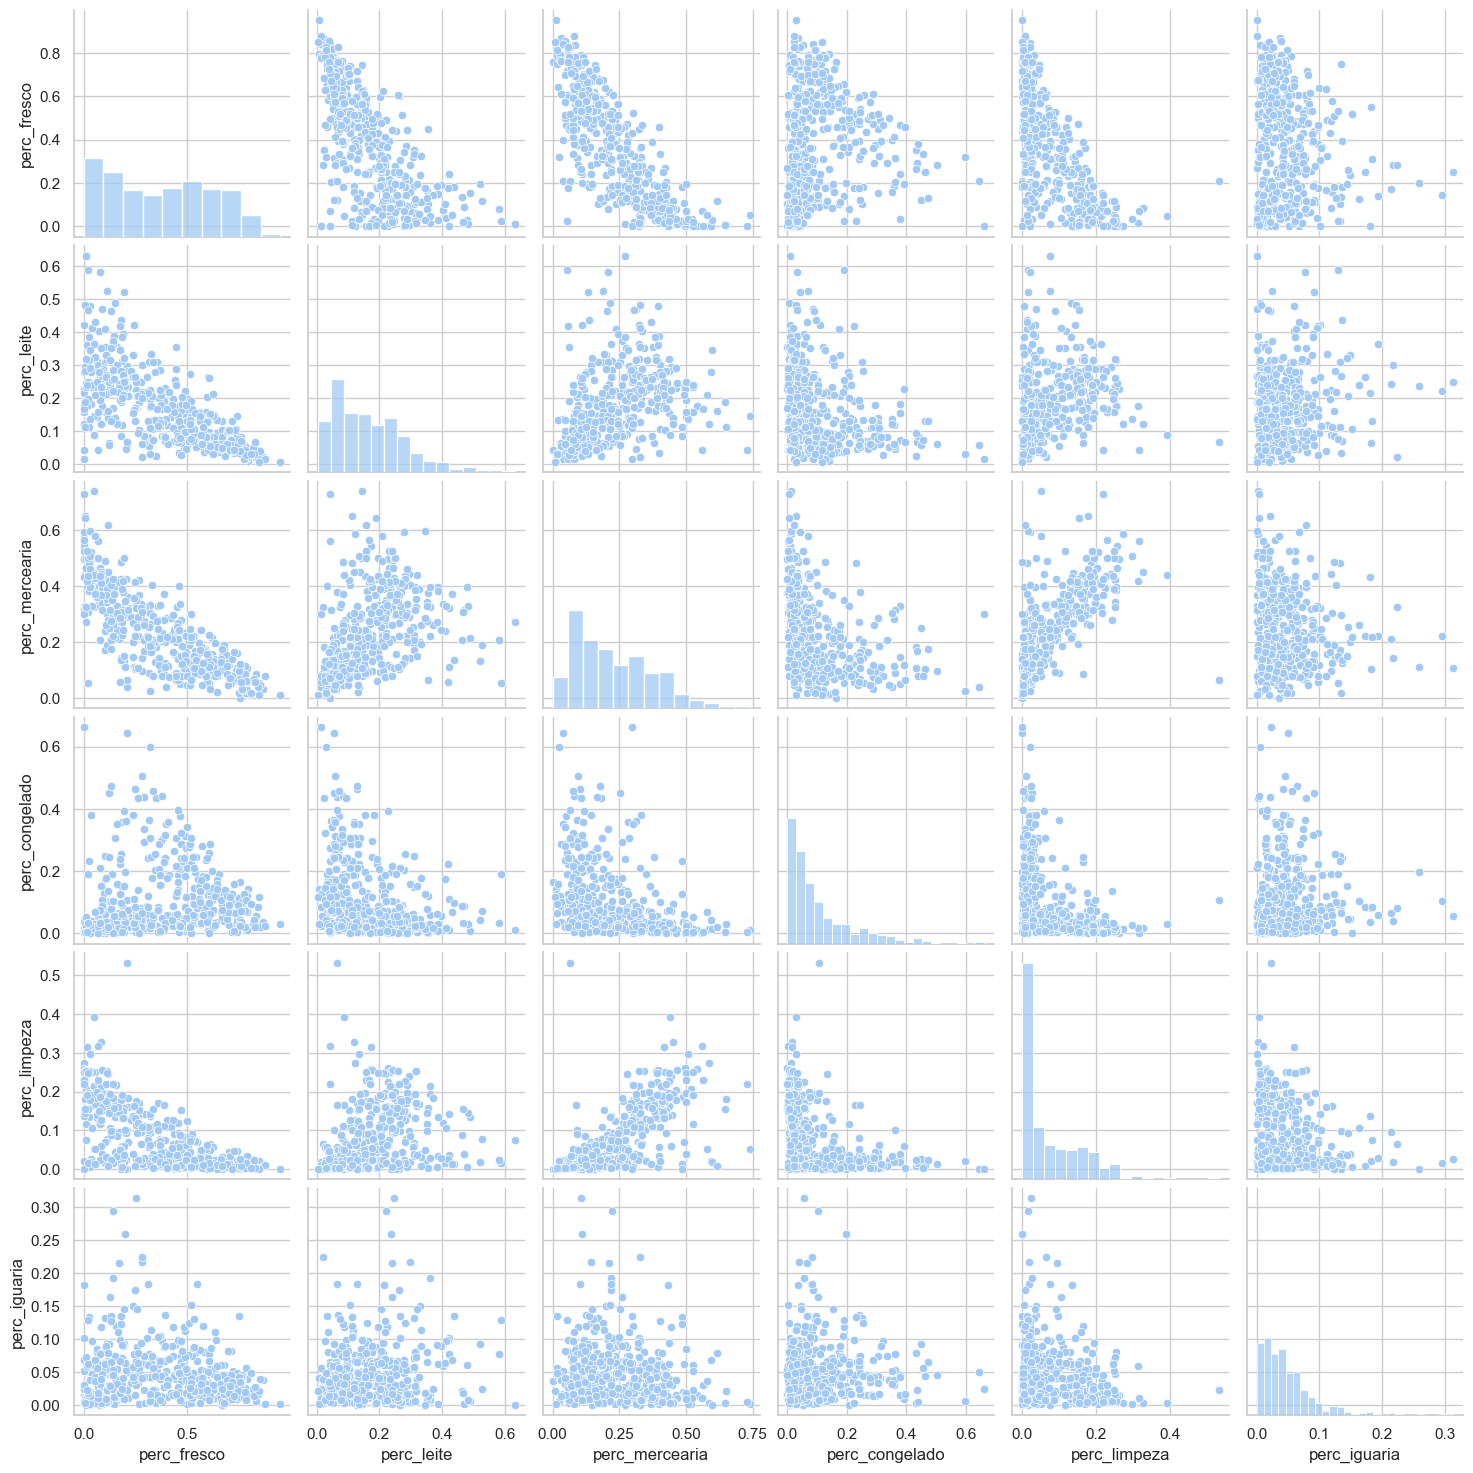

In [46]:
#checando a distribuição de dados
sns.pairplot(df_rel);

In [47]:
#rodando k-means com 3 grupos
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

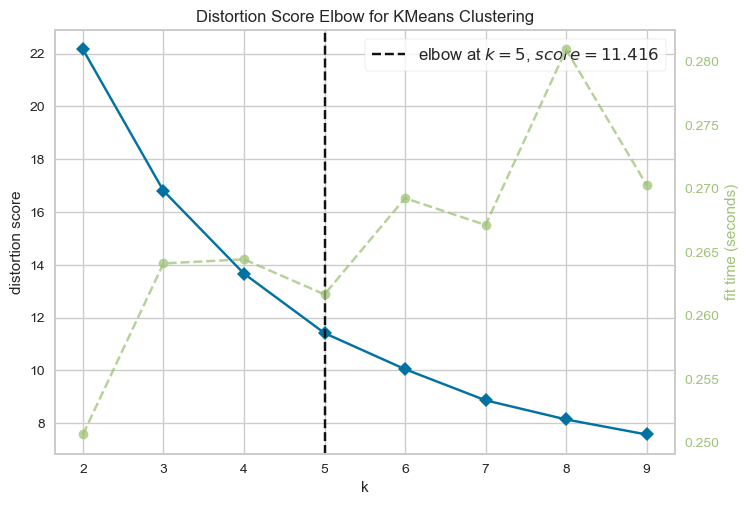

In [48]:
#checando valor ideal de k
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True)
visualizer.fit(df_rel) 
visualizer.show(); 

#l ideal = 5

In [49]:
#checando grupos
kmeans = KMeans(n_clusters=5, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

In [50]:
df_rel['cluster'] = labels

In [51]:
#grupo 0 gasta quase 70% com alimentos frescos
#grupo 1 tem um alto gasto em leite, mercearia e limpeza
#grupo 2 frescos, mercearia e congelado
#grupo 3 fresco, leite e mercearia
#grupo 4 fresco, leite, mercearia também mas com um gasto bem superior em frescos comparado ao grupo 3 e inferior a mercearia
df_rel.groupby('cluster').mean()

,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
cluster,,,,,,
0,0.695304,0.068209,0.090417,0.095122,0.015603,0.035345
1,0.081115,0.221478,0.445534,0.034944,0.181795,0.035133
2,0.374955,0.102833,0.132356,0.318957,0.024028,0.046871
3,0.180943,0.311129,0.260227,0.081023,0.089844,0.076834
4,0.467870,0.146105,0.221307,0.058423,0.056012,0.050283


In [52]:
from sklearn.decomposition import PCA

In [53]:
# visualização 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_rel)

#o resultado mostra que é possive chegar no resultado final só utilizando o primeiro componente
print(pca.explained_variance_ratio_)

[0.9520818  0.03492302]


In [54]:
k=5
kmeans = KMeans(n_clusters=k, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

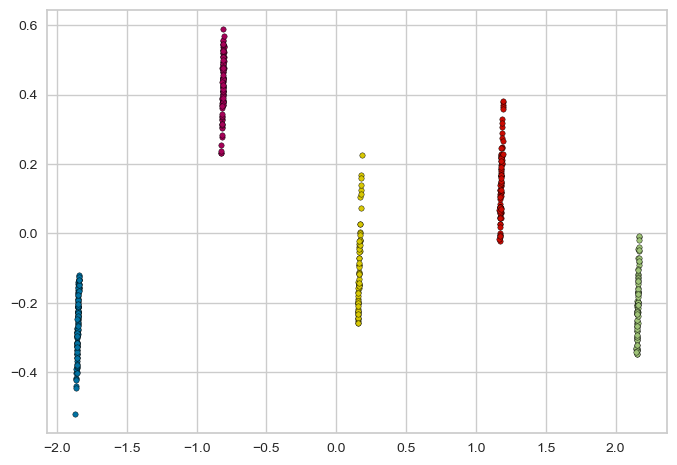

In [55]:
# Dados Reais
# plotando o grafico com o resultado do PCA
for n in range(k):
    plt.scatter(pca_features[labels == n, 0], pca_features[labels == n, 1], edgecolors='black', s=15)
plt.plot();
#é observado que realmente há 5 grupos bem separados

## Segmentação de imagens médicas:

In [55]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette="pastel")
%matplotlib inline

import cv2
import glob
import csv

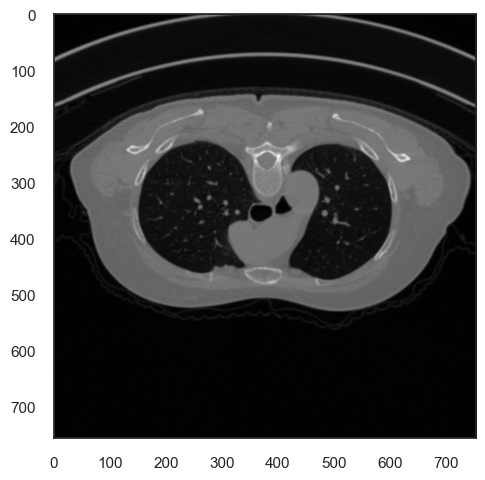

In [56]:
exam_path = 'c:/csv/medical/slice001.png'
image = cv2.imread(exam_path)
plt.imshow(image);
#Radiografiade um pulmão
#a ideia é fazer uma segmentação da imagem
#dividir a imagem pra analisar a area de interesse

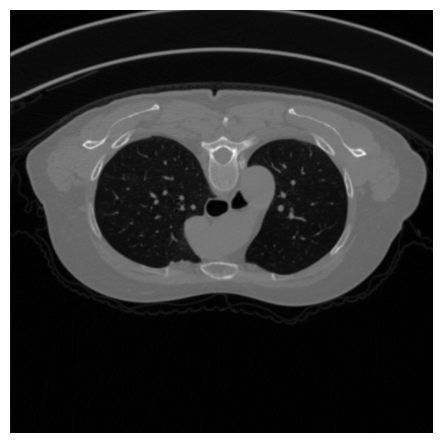

In [57]:
#tratando a imagem para transformar em objeto para o opencv
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray");
plt.axis('off');

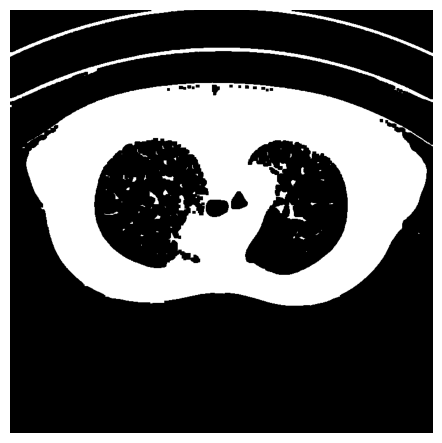

In [58]:
#definindo a imagem em apenas 2 tons(Branco e preto)
_ , mask = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((5, 5), np.uint8))
plt.imshow(mask, cmap = "gray")
plt.axis('off')
cv2.imwrite('c:/csv/medical/thresholding.png', cv2.hconcat([image, np.stack((mask, mask, mask), axis=2)]));

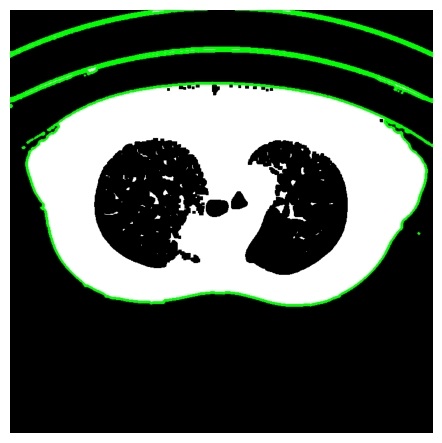

In [59]:
#encontrando os contornos da imagem
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#contornos = linha verde
contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off');

#é observado que a parte interna do pulmão n ta sendo reconhecida

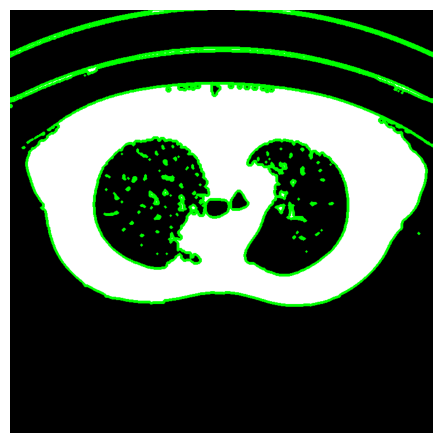

In [60]:
#alterando o parametro pra RETR_TREE para encontrar todos os contornos até os internos
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off');

In [61]:
#encontrando o contorno
filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    sz=4000 #parametro de area
    if (area > sz) & (area < 20*sz):#definindo parametro pra contorno, se não corresponder o parametro é descartado
        filtered_contours.append(contour)
      
        masked = np.zeros_like(image[:, :, 0])  
        cv2.drawContours(masked, [contour], 0, 255, -1)

        B_mean, G_mean, R_mean, _ = cv2.mean(image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

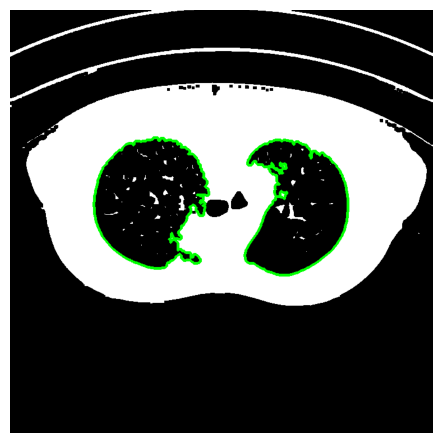

In [62]:
#gerando nova imagem que atenda os parametros definidos na função anterior
contours_img_after_filtering = mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 3)

plt.imshow(contours_img_after_filtering)
plt.axis('off')

cv2.imwrite('./data/medical/contours.png', cv2.hconcat([contours_img_before_filtering, contours_img_after_filtering]));

In [63]:
#utilizandoo kmeans pra separar a imagem em partes
km = KMeans(n_clusters=2) #separando em 2 imagens
df_mean_color['label'] = km.fit_predict(df_mean_color)

In [64]:
#Função pra segmentar a imagem
def draw_segmented_objects(image, contours, label_cnt_idx, bubbles_count):
    mask = np.zeros_like(image[:, :, 0])
    cv2.drawContours(mask, [contours[i] for i in label_cnt_idx], -1, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image = cv2.putText(masked_image, f'{bubbles_count} bubbles', (200, 1200), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 3, color = (255, 255, 255), thickness = 10, lineType = cv2.LINE_AA)
    return masked_image

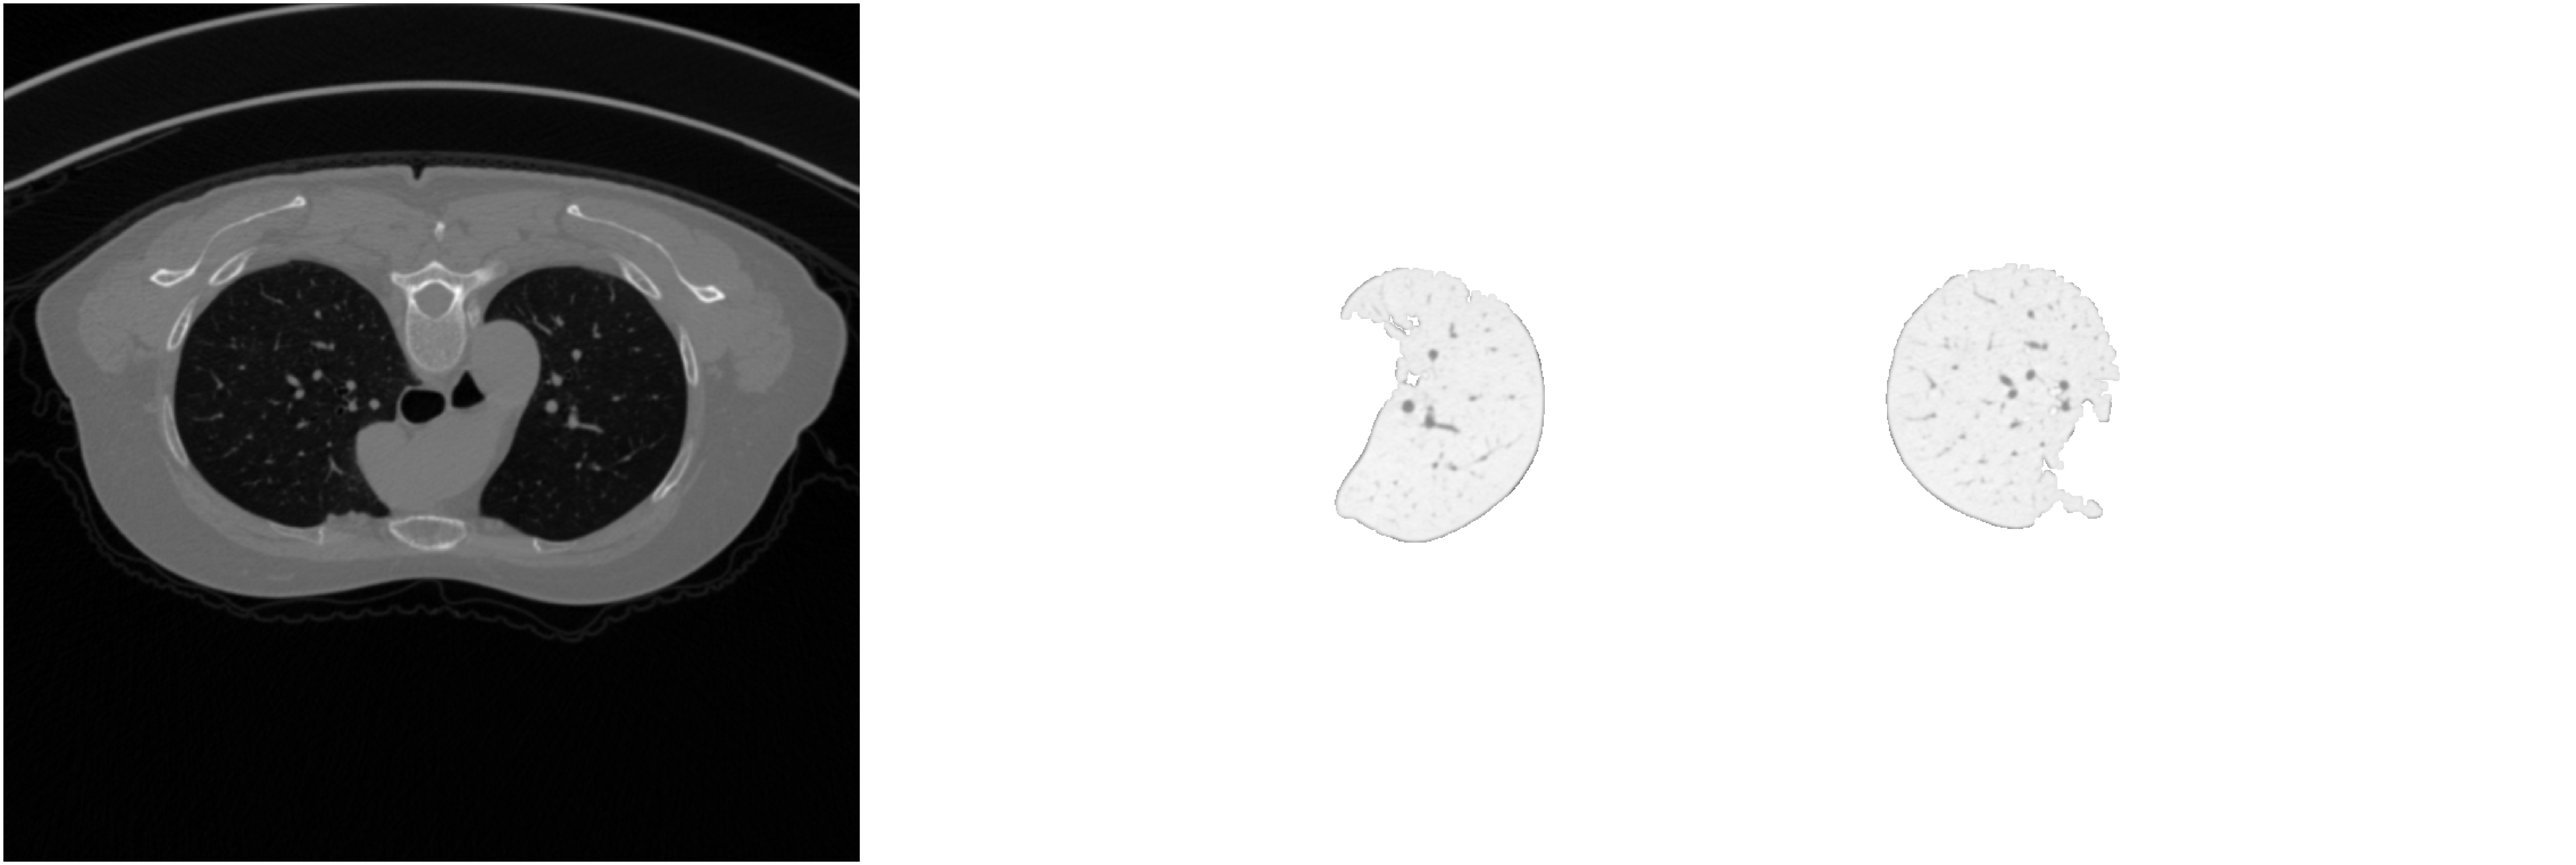

In [65]:
img = image.copy()
plt.figure(figsize = (100,40))
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(image, contours, df_grouped.index, bubbles_amount)
    temp = np.invert(masked_image)
    img = cv2.hconcat([img, temp])
    

cv2.imwrite('./data/medical/color_segmentation.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.axis('off');

#a imagem original e a segmentação dos 2 pulmões

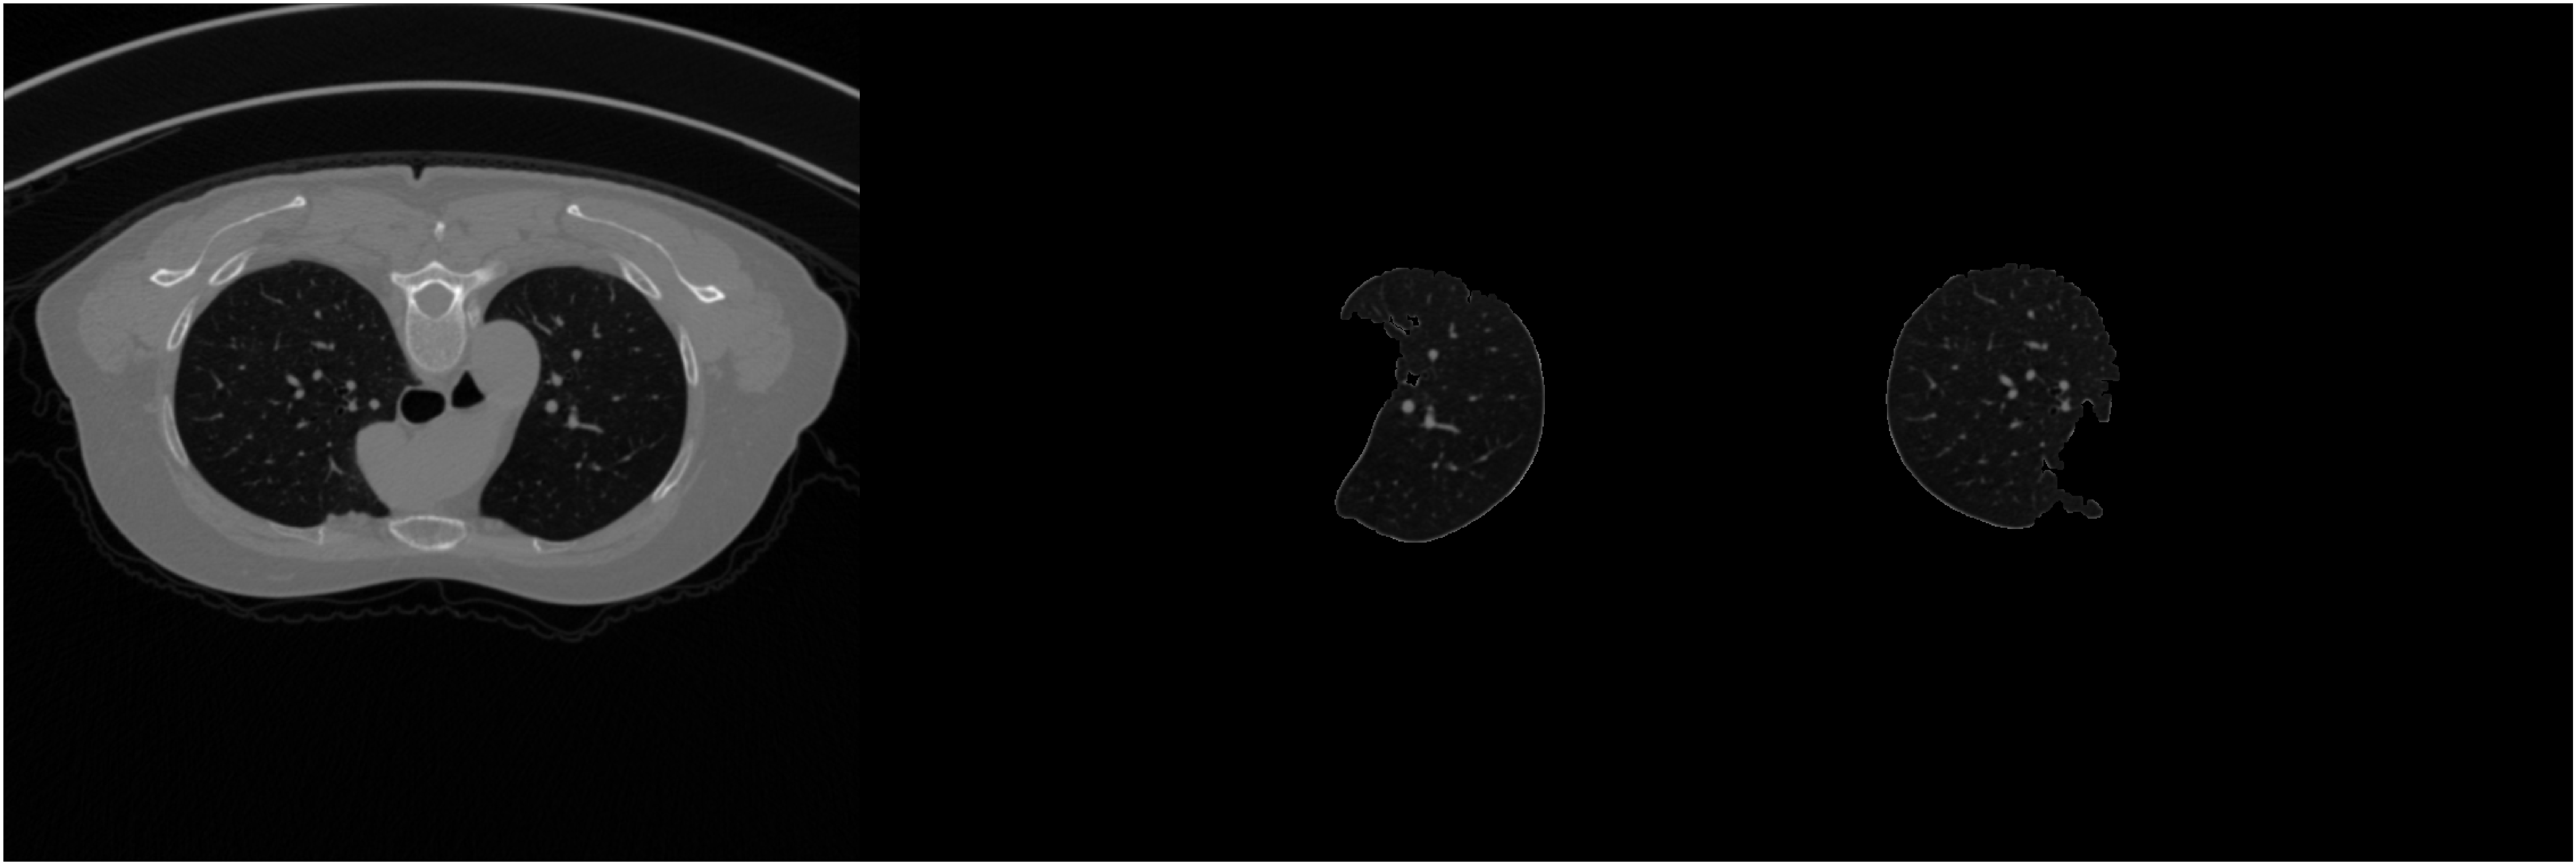

In [54]:
#mudando para a cor original

img = image.copy()
plt.figure(figsize = (100,40))
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(image, contours, df_grouped.index, bubbles_amount)
    #temp = np.invert(masked_image)
    img = cv2.hconcat([img, masked_image])
    

cv2.imwrite('./data/medical/color_segmentation.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.axis('off');

#segmentando permite aplicar outras mascaras de imagem pra aplicar cores e ver se é possivel encontrar pontos que façam sentido

In [66]:
#Categorização de noticias:

#Imagina que o projeto de analise textual que por exemplo categoriza a artigos que são submetidos a um site ou noticias que sejam digitalizadas e automaticamente categorizadas
#então esse processo vai ser automatizado para que uma pessoa não tenha que fazer isso
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('C:/csv/news/bbc-text.csv')
df.head()
#aqui já tem as repostas da categoria mas o foco do projeto é não precisar usar dele
#também é necessario transformar o texto em informações numericas para a anlise

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [68]:
#checando as categorias
df.category.value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [69]:
#listando quantas noticias há de cada um
total_categorias = df.category.value_counts().values
total_categorias

array([511, 510, 417, 401, 386], dtype=int64)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

#vetorizando as palavras
# max_df =  palavras ou termos que aparecem em mais de 50% dos documentos
#min df =  que aparecem em ao menos 5 documentos

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",#removendo stopwords por não ter valor de informações
)

In [71]:
#aplicando o vetorizador no conjunto de dados
t0 = time()
X_tfidf = vectorizer.fit_transform(df.text)
print(f"vetorização completa em {time() - t0:.3f} s")
print(f"n_observacoes: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")
#2225 observações e + de 9000 features

vetorização completa em 0.374 s
n_observacoes: 2225, n_features: 9136


In [72]:
#quantas variaveis de fatos foram encontradas?
#Apenas 14% tem valor diferente de 0
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.014


In [73]:
#diminuindo os valores de 0
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=5,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Número de elementos em cada cluster: {cluster_sizes}")
print()
print(
    "Número de documentos em cada cluster real: "
    f"{total_categorias}"
)

Número de elementos em cada cluster: [298 317 508 821 281]
Número de elementos em cada cluster: [510 779 489 142 305]
Número de elementos em cada cluster: [264 912 490 386 173]
Número de elementos em cada cluster: [758 525 404 169 369]
Número de elementos em cada cluster: [780 540 390 171 344]

Número de documentos em cada cluster real: [511 510 417 401 386]


In [74]:
#redução de dimensionalidade LSA
from sklearn.decomposition import TruncatedSVD #para diminuir o tempo e aumentar a qualidade de analise
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False)) # Criando um pipeline com TruncatedSVD e Normalizer
t0 = time() # Gravando o tempo antes de iniciar a transformação
X_lsa = lsa.fit_transform(X_tfidf) # Aplicando o pipeline para transformar o conjunto de dados X_tfidf
explained_variance = lsa[0].explained_variance_ratio_.sum() # Calculando a variância explicada pelos componentes principais retidos

print(f"LSA concluido em {time() - t0:.3f} s") # Imprimindo o tempo de execução do LSA
print(f"Variação explicado do SVD: {explained_variance * 100:.1f}%") # Imprimindo a variância explicada pelo SVD truncado

LSA concluido em 0.357 s
Variação explicado do SVD: 26.3%


In [75]:
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(X_lsa)
    labels = kmeans_model.labels_
    print(f"k={i} - silhueta={metrics.silhouette_score(X_lsa, labels, metric='euclidean'):.3f}")
    print(f"k={i} - rand_index={metrics.adjusted_rand_score(df.category.values, labels):.3f}")
    print(20*' * ')

k=2 - silhueta=0.041
k=2 - rand_index=0.313
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=3 - silhueta=0.051
k=3 - rand_index=0.414
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=4 - silhueta=0.059
k=4 - rand_index=0.639
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=5 - silhueta=0.070
k=5 - rand_index=0.907
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=6 - silhueta=0.072
k=6 - rand_index=0.832
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=7 - silhueta=0.077
k=7 - rand_index=0.723
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=8 - silhueta=0.075
k=8 - rand_index=0.668
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=9 - silhueta=0.084
k=9 - rand_index=0.668
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 


In [76]:
#checando quais palavras impactam mais os grupos
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
    random_state=seed,
).fit(X_lsa)

labels = kmeans.labels_

In [77]:
# gerando clusters de palavras mais frequentes
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(5):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: england wales ireland rugby robinson nations france game coach scotland 
Cluster 1: company growth market shares firm bank economy sales mr oil 
Cluster 2: mr labour government election blair party minister people brown howard 
Cluster 3: film music people tv best new mr mobile uk band 
Cluster 4: game club chelsea cup win season play world time final 


In [78]:
#checando os grupos que estão disponiveis

#por exemplo o cluster 4 está ligado a esporte
#cluster 1 a business
#Cluster 3 Business
#cluster 2 a politica
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)